<a href="https://colab.research.google.com/github/dhruvprabhu/NLP_Project/blob/main/NLPproject1_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
#These are the python libraries used

In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#To open the file
file = open(r"T.txt",encoding='utf-8')
listofwords = file.read().splitlines()
page_number_pattern = re.compile(r'\d+')
listofwords = [i for i in listofwords if i!='' and i!='The Hound of the Baskervilles' and i!='\x18'
               and not page_number_pattern.match(i) and i!='Download free eBooks of classic literature, books and'
               and i!='novels at Planet eBook. Subscribe to our free eBooks blog' and i!='and email newsletter.']
text = " ".join(listofwords)

In [ ]:
#string which contains the punctuations which we want removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
processed_text = ""
for i in text:
    if i not in punctuations:
        processed_text = processed_text + i

#Making the result lowercase
processed_text = processed_text.lower()
substring_to_remove_1 = "free ebooks at planet ebookcom"
processed_text= processed_text.replace(substring_to_remove_1, "")
pattern = r'chapter \d+'
processed_text = re.sub(pattern, '', processed_text)
print(processed_text[:100])#print for 100 characters



the hound of the baskervilles by arthur conan doyle download free ebooks of classic literature books


Now tokenise the processed_text

In [ ]:
tokenisedtext = word_tokenize(processed_text)
print(tokenisedtext[:10])

In [ ]:
# Stop words need to be removed.
stop_words = set(stopwords.words('english'))
final_tokens = [i for i in tokenisedtext if not i in stop_words]
finaltext = "  "
finaltext = finaltext.join(final_tokens)
print(finaltext[:100]) #after removing stopwords

In [ ]:
#Frequency Distrubution
freq_dist=nltk.FreqDist(finaltext)
print(freq_dist.most_common(15))
freq_dist=list(freq_dist)

In [ ]:
import seaborn as sb
sb.set(style='darkgrid')
dataf=pd.DataFrame(tokenisedtext)

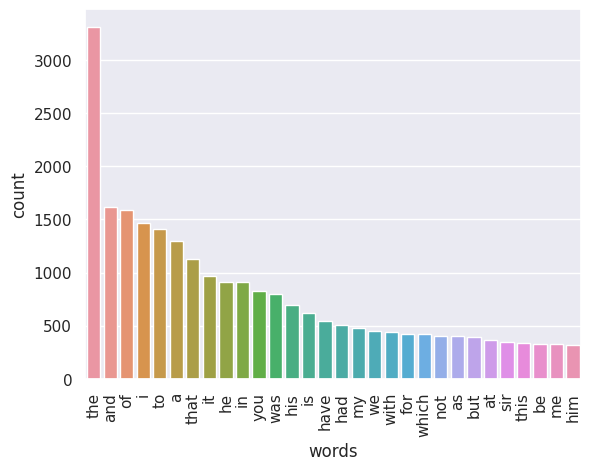

In [ ]:
sb.countplot(x=dataf[0],order=dataf[0].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.xlabel('words')
plt.show()
#Plotting the counts of the most frequent words ordered in descending order of their frequencies.

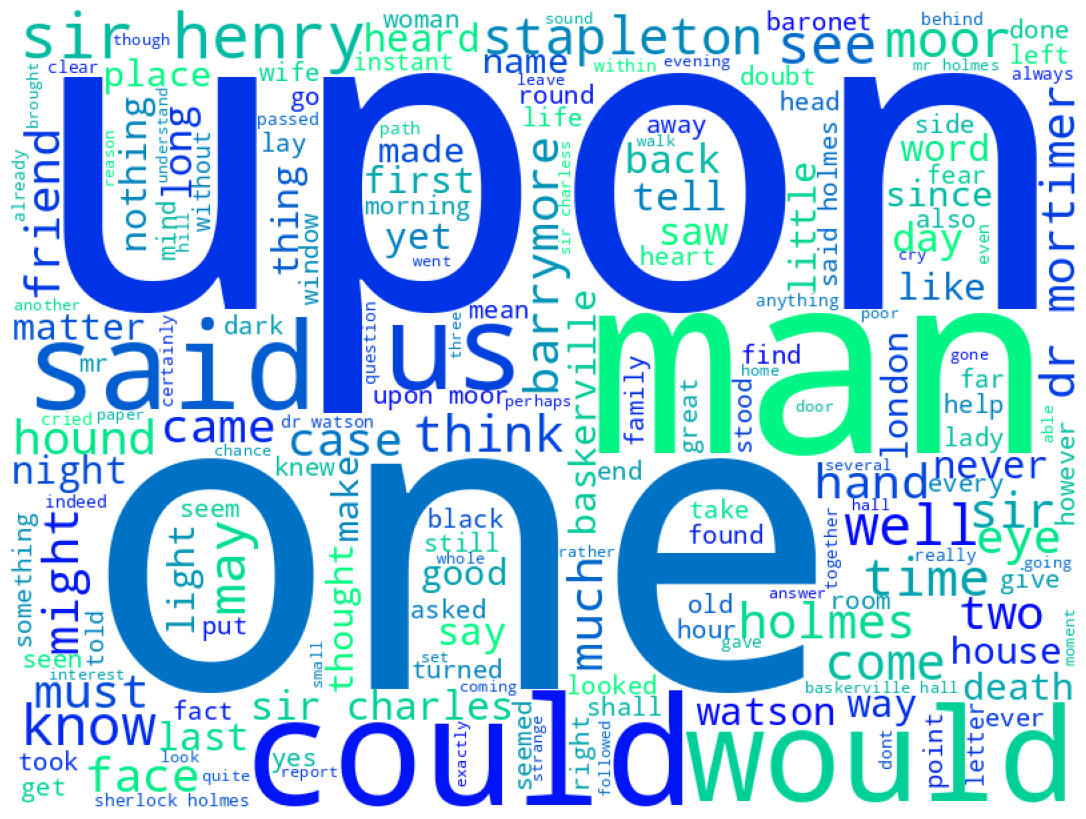

In [ ]:
# Word cloud
wc = WordCloud(width = 800, height = 600,
                background_color ='white',
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext)

plt.figure(figsize = (12,8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
nltk.download("treebank")
pos_tags = nltk.pos_tag(final_tokens)
print(pos_tags[:20])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


[('hound', 'NN'), ('baskervilles', 'NNS'), ('arthur', 'VBP'), ('conan', 'JJ'), ('doyle', 'JJ'), ('download', 'NN'), ('free', 'JJ'), ('ebooks', 'NNS'), ('classic', 'JJ'), ('literature', 'NN'), ('books', 'NNS'), ('novels', 'JJ'), ('planet', 'NN'), ('ebook', 'NN'), ('subscribe', 'VBD'), ('free', 'JJ'), ('ebooks', 'NNS'), ('blog', 'IN'), ('email', 'JJ'), ('newsletter', 'NN')]


In [ ]:
from collections import Counter
counts = Counter( tag for word,  tag in pos_tags)
print(counts)

Counter({'NN': 8645, 'JJ': 4981, 'VBD': 2270, 'NNS': 2106, 'RB': 1976, 'VB': 1043, 'VBP': 1037, 'VBN': 893, 'VBG': 844, 'IN': 773, 'MD': 716, 'CD': 407, 'VBZ': 298, 'PRP': 182, 'JJR': 90, 'DT': 80, 'JJS': 73, 'RBR': 65, 'RP': 38, 'NNP': 12, 'WP$': 9, 'WDT': 9, 'WP': 9, 'FW': 8, 'UH': 8, 'CC': 8, 'RBS': 3, '$': 2, 'WRB': 2, 'PRP$': 1})


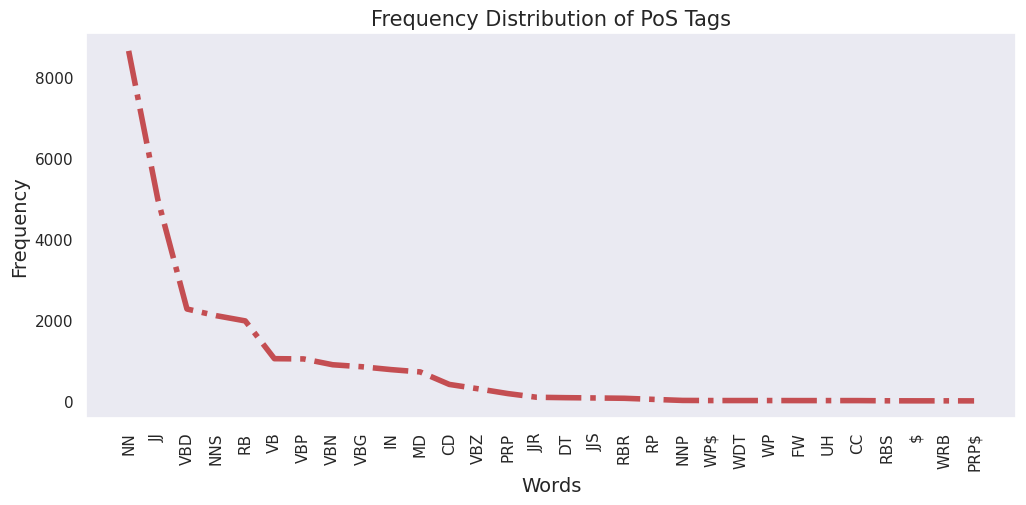

In [ ]:
#Frequency Distribution of varios PoS Tags

pos_tags_freq = nltk.FreqDist(counts)
pos_tags_freq = {k: v for k, v in sorted(pos_tags_freq.items(), key=lambda item: item[1],reverse=True)}
x = list(pos_tags_freq.keys())[:40]
y = list(pos_tags_freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Frequency Distribution of PoS Tags',size=15)
plt.xlabel('Words',size=14)
plt.ylabel('Frequency',size=14)
plt.show()


We will now process the largest chp C.txt

In [ ]:
from nltk import bigrams, FreqDist
file = open(r"C.txt",encoding='utf-8')
list_of_chp = file.read().splitlines()
page_number_pattern = re.compile(r'\d+')
list_of_chp = [i for i in listofwords if i!='' and i!='The Hound of the Baskervilles' and i!='\x18' and not page_number_pattern.match(i)]
text = " ".join(listofwords)

punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
change_txt = ""
for i in text:
    if i not in punctuations:
        change_txt = change_txt + i

#to make the result lowercase
change_txt = change_txt.lower()
substring_to_remove_1 = "free ebooks at planet ebookcom"
change_txt= change_txt.replace(substring_to_remove_1, "")
pattern = r'chapter \d+'
change_txt = re.sub(pattern, '', change_txt)

tokens = word_tokenize(change_txt)


# Generate bigrams
bigram_tuples = list(bigrams(tokens))

# Count bigram frequencies
bigram_freq = FreqDist(bigram_tuples)

# Create a bigram probability table
bigram_probabilities = {}

for bigram in bigram_freq:
    preceding_word, following_word = bigram
    if preceding_word not in bigram_probabilities:
        bigram_probabilities[preceding_word] = {}

    probability = bigram_freq[bigram] / tokens.count(preceding_word)
    bigram_probabilities[preceding_word][following_word] = probability


# Create a counter for preceding words
preceding_word_count = 0
#bigram probability table displayed for 5x5
for preceding_word in bigram_probabilities:
    if preceding_word_count < 5:

        following_word_count = 0
        for following_word, probability in bigram_probabilities[preceding_word].items():
            if following_word_count < 5:
                print(f"{preceding_word}, {following_word}, Probability : {probability:.4f}")
                following_word_count += 1
        preceding_word_count += 1



of, the, Probability : 0.2709
of, his, Probability : 0.0572
of, a, Probability : 0.0534
of, it, Probability : 0.0314
of, my, Probability : 0.0251
in, the, Probability : 0.2750
in, a, Probability : 0.0759
in, his, Probability : 0.0649
in, my, Probability : 0.0385
in, this, Probability : 0.0330
it, was, Probability : 0.1744
it, is, Probability : 0.1610
it, i, Probability : 0.0268
it, and, Probability : 0.0258
it, would, Probability : 0.0217
i, have, Probability : 0.0997
i, had, Probability : 0.0689
i, am, Probability : 0.0546
i, was, Probability : 0.0532
i, could, Probability : 0.0498
the, moor, Probability : 0.0420
the, man, Probability : 0.0142
the, same, Probability : 0.0112
the, baronet, Probability : 0.0112
the, matter, Probability : 0.0106


In [ ]:
import random

# Now we play Shannon's game
sentences = [
    ("in some ways they have within the last fortyeight",  # Expected next word: "hours"
     "hours"),
    ("window would serve the",  # Expected next word: "purpose"
     "purpose"),
    ("i can hardly imagine how",  # Expected next word: "he"
     "he"),
    ("but whatever the true explanation of",  # Expected next word: "Barrymore’s"
     "Barrymore’s"),
    ("after the conversation which I",  # Expected next word: "have"
     "have"),
    ("it put me in a most awkward",  # Expected next word: "position"
     "position"),
    ("i imagined what my feelings",  # Expected next word: "would"
     "would"),
    ("hurried along the road at the top",  # Expected next word: "of"
     "of"),
    ("it was Stapleton with his",  # Expected next word: "butterfly-net"
     "butterfly-net"),
    ("stapleton was the cause of the",  # Expected next word: "interruption"
     "interruption")
]

correct_predictions = 0

for sentence, expected_next_word in sentences:
    words = sentence.lower().split()  # Tokenize the given sentence

    current_word = words[-1]  # Take the last word as the current word

    if current_word in bigram_probabilities:
        next_word = random.choices(
            list(bigram_probabilities[current_word].keys()),
            weights=list(bigram_probabilities[current_word].values())
        )[0]
    else:
        # If the current word doesn't have associated bi-grams, choose a random word
        next_word = random.choice(list(bigram_probabilities.keys()))

    if next_word == expected_next_word:
        correct_predictions += 1

    generated_sentence = ' '.join(words + [next_word])
    print(f"Generated: {next_word}\nExpected: {expected_next_word}\n")

accuracy = (correct_predictions / len(sentences)) * 100
print(f"Accuracy: {accuracy:.2f}%")


Generated: hours
Expected: hours

Generated: first
Expected: purpose

Generated: the
Expected: he

Generated: public
Expected: Barrymore’s

Generated: could
Expected: have

Generated: position
Expected: position

Generated: would
Expected: would

Generated: of
Expected: of

Generated: bogie
Expected: butterfly-net

Generated: man
Expected: interruption

Accuracy: 40.00%


**************************************       ROUND 2             **************************************

In [ ]:
pip install spacy


In [ ]:
import spacy
from spacy import displacy
from spacy import tokenizer
from spacy. scorer import Scorer
from spacy. tokens import Doc
from spacy. training import Example

Below is code to preprocess the T.txt file and then we move to round 2

In [ ]:


# Import necessary libraries
import spacy
import re

# Load the English core web model
nlp = spacy.load("en_core_web_sm")

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove unwanted text
    text = re.sub(r'The Hound of the Baskervilles', '', text)
    text = re.sub(r'\x18', '', text)
    text = re.sub(r'Download free eBooks of classic literature, books and novels at Planet eBook. Subscribe to our free eBooks blog and email newsletter.', '', text)
    # Remove page numbers
    text = re.sub(r'\d+', '', text)
    # Remove chapter headings
    text = re.sub(r'Chapter \d+', '', text)
    # Tokenize the text
    doc = nlp(text)
    # Remove stop words and punctuation, and lemmatize the tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # Join the tokens back into a string
    processed_text = ' '.join(tokens)
    # Convert the text to lowercase
    processed_text = processed_text.lower()
    return processed_text

# Read the input file
with open('T.txt', 'r', encoding='utf-8') as f:
    input_text = f.read()

# Preprocess the input text
output_text = preprocess_text(input_text)

# Write the output text to a new file
with open('Preprocessed_text.txt', 'w', encoding='utf-8') as f:
    f.write(output_text)

In [ ]:
import spacy

# Load the English core web model
nlp = spacy.load("en_core_web_sm")

# Define a function to recognize entities and their types in a text
def recognize_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Read the book text from a file
with open("Preprocessed_text.txt", "r") as f:
    book_text = f.read()

# Recognize entities and their types in the book text
book_entities = recognize_entities(book_text)
print(book_entities)


In [ ]:
for entity, entity_type in book_entities:
        print(f"Entity: {entity}, Type: {entity_type}")

Performance Evaluation

sample_text1 - "like moorland
 uproar call pistol
 horse flask wine
 length sense come craze mind
 thirteen number take horse
 start pursuit moon shine clear
 ride swiftly abreast take course maid
 need take reach home
 go mile pass
 night shepherd "
** NER **

handlabelled entity1=
 [("Hugo Baskerville", "PERSON"),
 ("Moorland", "LOC"),
 ("Moon", "ART"),
 ("Horse", "ANIMAL"),
 ("Flask", "PRODUCT"),
 ("Wine", "DRINK"),
 ("Thirteen", "CARDINAL"),
 ("Mile", "QUANTITY"),
 ("Shepherd", "PERSON"),
  ]


sample_text2 = "see devonshire man swear county remark depend breed man county say dr. mortimer glance friend reveal rounded head celt carry inside celtic enthusiasm power attachment poor sir charles head rare type half gaelic half ivernian characteristic young see baskerville."


handlabelled entity2 =  [("Devonshire", "LOC"), ("Dr. Mortimer", "PERSON"), ("Celt", "NORP"), ("Sir Charles", "PERSON"), ("Baskerville", "PERSON")]



sample_text3 = "south america establish identity british authority obtain fortune come england adopt elaborate disguise short time need london furnish accomplice proof paper put heir retain claim proportion income doubt know find way difficulty dear watson."

handlabelled entity3 = [("South America", "LOC"), ("British", "NORP"), ("England", "LOC"), ("London", "LOC"), ("Watson", "PERSON")]


In [ ]:
import spacy
from sklearn.metrics import f1_score, classification_report

def calculate_f1_scores(sample_text, true_entities):
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Perform named entity recognition
    doc = nlp(sample_text)
    recognized_entities = [(ent.text.lower(), ent.label_) for ent in doc.ents]

    # Extract recognized entities of specified types
    valid_entity_types = ["LOC", "ART", "ANIMAL", "PRODUCT", "DRINK", "CARDINAL", "QUANTITY", "PERSON"]
    filtered_recognized_entities = [(text, label) for text, label in recognized_entities if label in valid_entity_types]

    # Generate true labels and recognized labels
    true_labels = [label for _, label in true_entities]
    recognized_labels = [label for _, label in filtered_recognized_entities]

    # Make sure the lengths are the same
    recognized_labels = recognized_labels + ['O'] * (len(true_labels) - len(recognized_labels))

    # Calculate entity-wise F1 score
    entity_f1_scores = classification_report(true_labels, recognized_labels, labels=valid_entity_types)

    # Calculate overall F1 score
    overall_f1_score = f1_score(true_labels, recognized_labels, labels=valid_entity_types, average='weighted')

    return entity_f1_scores, overall_f1_score

# Sample Text 1 and True Entities 1
sample_text1 = "like moorland uproar call pistol horse flask wine length sense come craze mind thirteen number take horse start pursuit moon shine clear ride swiftly abreast take course maid need take reach home go mile pass night shepherd."
true_entities1 = [("Hugo Baskerville", "PERSON"), ("Moorland", "LOC"), ("Moon", "ART"), ("Horse", "ANIMAL"), ("Flask", "PRODUCT"), ("Wine", "DRINK"), ("Thirteen", "CARDINAL"), ("Mile", "QUANTITY"), ("Shepherd", "PERSON")]

# Sample Text 2 and True Entities 2
sample_text2 = "see devonshire man swear county remark depend breed man county say dr. mortimer glance friend reveal rounded head celt carry inside celtic enthusiasm power attachment poor sir charles head rare type half gaelic half ivernian characteristic young see baskerville."
true_entities2 = [("Devonshire", "LOC"), ("Dr. Mortimer", "PERSON"), ("Celt", "NORP"), ("Sir Charles", "PERSON"), ("Baskerville", "PERSON")]

# Sample Text 3 and True Entities 3
sample_text3 = "south america establish identity british authority obtain fortune come england adopt elaborate disguise short time need london furnish accomplice proof paper put heir retain claim proportion income doubt know find way difficulty dear watson."
true_entities3 = [("South America", "LOC"), ("British", "NORP"), ("England", "LOC"), ("London", "LOC"), ("Watson", "PERSON")]

# Calculate and print F1 scores
entity_f1_scores1, overall_f1_score1 = calculate_f1_scores(sample_text1, true_entities1)
entity_f1_scores2, overall_f1_score2 = calculate_f1_scores(sample_text2, true_entities2)
entity_f1_scores3, overall_f1_score3 = calculate_f1_scores(sample_text3, true_entities3)

# Print entity-wise F1 scores and overall F1 scores
print("Entity-wise F1 Score Sample 1:")
print(entity_f1_scores1)
print("\nOverall F1 Score Sample 1:", overall_f1_score1)
print("\nEntity-wise F1 Score Sample 2:")
print(entity_f1_scores2)
print("\nOverall F1 Score Sample 2:", overall_f1_score2)
print("\nEntity-wise F1 Score Sample 3:")
print(entity_f1_scores3)
print("\nOverall F1 Score Sample 3:", overall_f1_score3)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Entity-wise F1 Score Sample 1:
              precision    recall  f1-score   support

         LOC       0.00      0.00      0.00       1.0
         ART       0.00      0.00      0.00       1.0
      ANIMAL       0.00      0.00      0.00       1.0
     PRODUCT       0.00      0.00      0.00       1.0
       DRINK       0.00      0.00      0.00       1.0
    CARDINAL       0.00      0.00      0.00       1.0
    QUANTITY       0.00      0.00      0.00       1.0
      PERSON       0.00      0.00      0.00       2.0

   micro avg       0.00      0.00      0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0


Overall F1 Score Sample 1: 0.0

Entity-wise F1 Score Sample 2:
              precision    recall  f1-score   support

         LOC       0.00      0.00      0.00         1
         ART       0.00      0.00      0.00         0
      ANIMAL       0.00      0.00      0.00         0
     PRODUCT       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Part 2 - TF-IDF

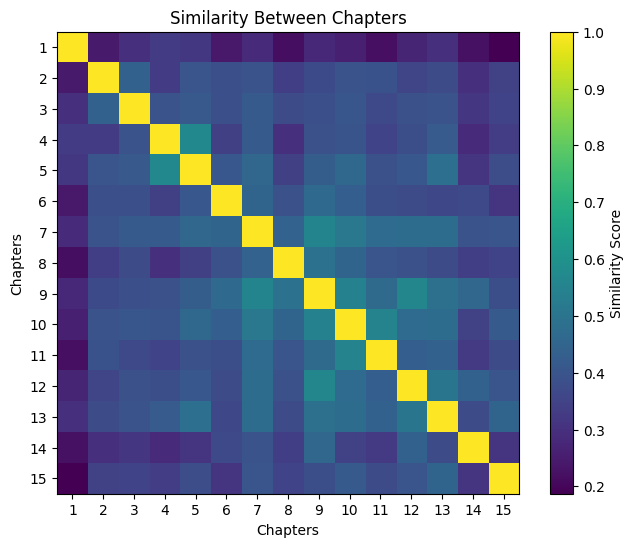

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the preprocessed chapter text files
directory = "chapters"

# Read preprocessed chapters from separate text files
chapters = []
for i in range(1, 16):  # Assuming 15 chapters
    filename = os.path.join(directory, f"c{i}.txt")
    with open(filename, 'r', encoding='utf-8') as file:
        chapter_text = file.read()
        chapters.append(chapter_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for each preprocessed chapter
tfidf_matrix = tfidf_vectorizer.fit_transform(chapters)

# Calculate cosine similarity between chapters
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Visualize similarity scores in a gradient table
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Similarity Between Chapters')
plt.colorbar(label='Similarity Score')
plt.xticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.yticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.xlabel('Chapters')
plt.ylabel('Chapters')
plt.show()
